In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def strat(df):
    #estratificacion por  precio de ticket
    
    rangos = list(range(-9,110,10)) + [np.inf]
    df["fare_buckets"] = pd.cut(df["Fare"],
                                bins= rangos ,
                                labels = [1,2,3,4,5,6,7,8,9,10,11,12])    
    return df


def titles(df):
    
    #diccionario que transforma el titulo en Mr Mrs y Master
    titulos = {' Mr': 'Mr', ' Mrs': 'Mrs', ' Miss': 'Miss', ' Master':' Master', ' Don': 'Mr', ' Rev': 'Mr', ' Dr': 'Mr', ' Mme': 'Mrs',
       ' Ms': 'Mrs', ' Major': 'Mr', ' Lady': 'Mrs', ' Sir': 'Mr', ' Mlle': 'Mrs', ' Col': 'Mr', ' Capt': 'Mr',
       ' the Countess': 'Mrs', ' Jonkheer': 'Mr'} 
    
    df["title"] = df["Name"].str.split(',', expand = True)[1].str.split('.', expand = True)[0]
    
    #modificar la siguiente funcion para que si el titulo no aparece en el diccionario devuelva una categoria "other c"
    df["title"] = df["title"].apply(lambda x: titulos[x] if (x in titulos) else 'other')
    
    return df


def fillAge(df):
    df["Age"] = df[['Age','title']].groupby("title").transform(lambda x: x.fillna(x.median()))
    return df


def preprocessedData(df):
    df = strat(df)
    df = titles(df)
    df = fillAge(df)
    #agregar estandarizar o normalizar la data
    return df
    

In [3]:
train = pd.read_csv("../titanic/data/train.csv")
test = pd.read_csv("../titanic/data/test.csv")

In [4]:
#Analsis exploratorio de datos

In [5]:
#Columnas y missing values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

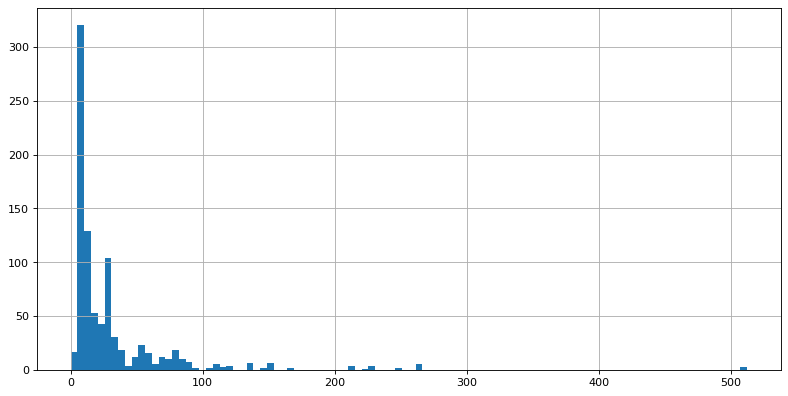

In [6]:
from matplotlib.pyplot import figure
figure(figsize=(12, 6), dpi=80)

train["Fare"].hist(bins = 100)

In [7]:
#estratificar por pasaje
train_strat = strat(train)

<AxesSubplot:>

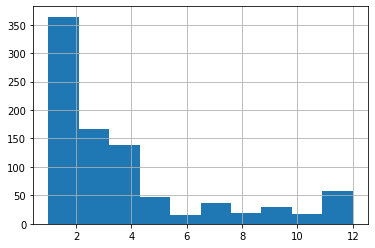

In [8]:
train_strat["fare_buckets"].hist()

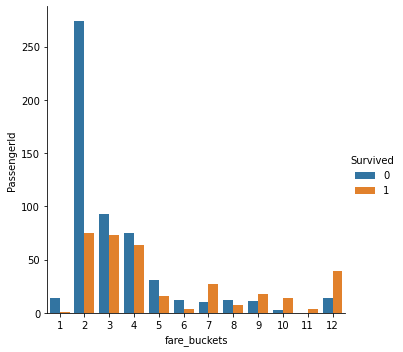

In [9]:
import seaborn as sns


survivors_by_fare = train_strat.groupby(["fare_buckets","Survived"])["PassengerId"].count() 
survivors_by_fare = survivors_by_fare.reset_index()

sns.catplot(x = "fare_buckets",       # x variable name
            y = "PassengerId",       # y variable name
            hue = "Survived",  # group variable name
            data = survivors_by_fare,     # dataframe to plot
            kind = "bar")

<Figure size 8640x5760 with 0 Axes>

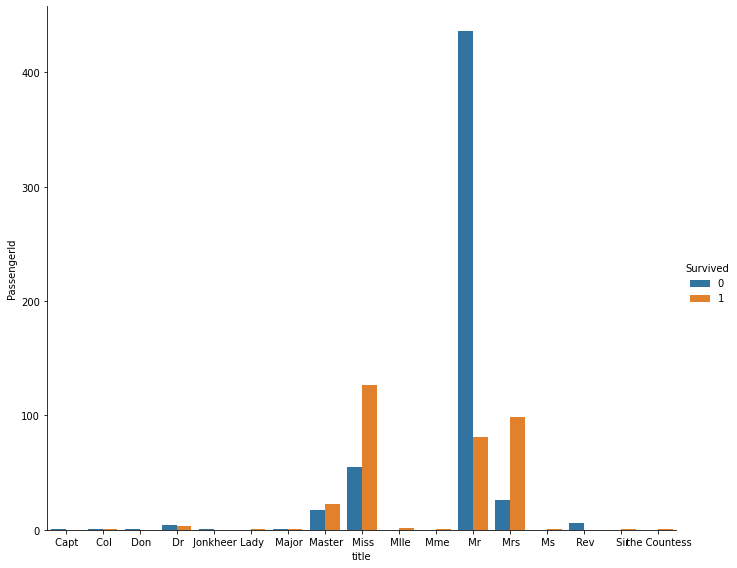

In [10]:
#sns.set(rc = {'figure.figsize':(20,8)})

train["title"] = train["Name"].str.split(',', expand = True)[1].str.split('.', expand = True)[0]

survivors_by_title = train.groupby(["title","Survived"])["PassengerId"].count() 
survivors_by_title = survivors_by_title.reset_index()

plt.figure(figsize = (120,80))
sns.catplot(x = "title",       # x variable name
            y = "PassengerId",       # y variable name
            hue = "Survived",  # group variable name
            data = survivors_by_title,     # dataframe to plot
            kind = "bar",height=8, aspect=1.2)
plt.show() 

<Figure size 8640x5760 with 0 Axes>

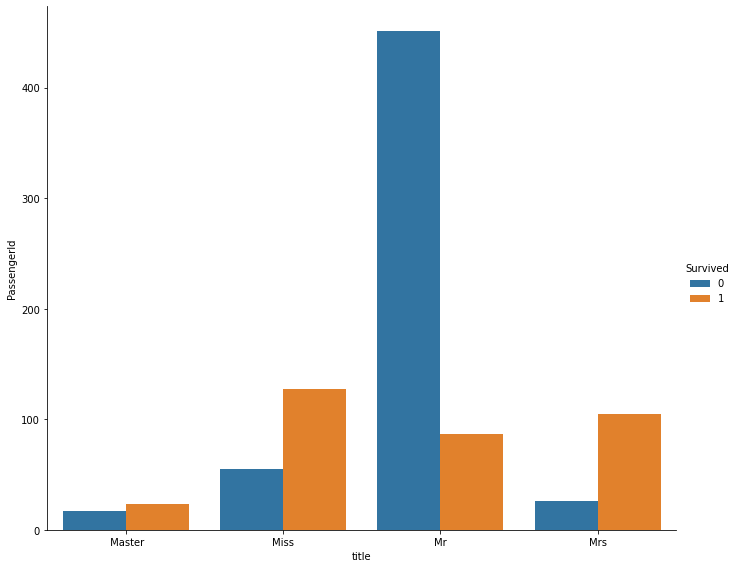

In [11]:
strat_title_train = titles(train_strat)

survivors_by_title = strat_title_train.groupby(["title","Survived"])["PassengerId"].count() 
survivors_by_title = survivors_by_title.reset_index()

plt.figure(figsize = (120,80))
sns.catplot(x = "title",       # x variable name
            y = "PassengerId",       # y variable name
            hue = "Survived",  # group variable name
            data = survivors_by_title,     # dataframe to plot
            kind = "bar",height=8, aspect=1.2)
plt.show() 

In [12]:
#contar missing values por titulo
strat_title_train.set_index('title').isna().sum(level=0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fare_buckets
title,,,,,,,,,,,,,
Mr,0,0,0,0,0,120,0,0,0,0,437,0,0
Mrs,0,0,0,0,0,17,0,0,0,0,82,1,0
Miss,0,0,0,0,0,36,0,0,0,0,135,1,0
Master,0,0,0,0,0,4,0,0,0,0,33,0,0


In [21]:
preprocessed_train = preprocessedData(train)
preprocessed_test = preprocessedData(test)

In [15]:
preprocessed_train.set_index('title').isna().sum(level=0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fare_buckets
title,,,,,,,,,,,,,
Mr,0,0,0,0,0,0,0,0,0,0,437,0,0
Mrs,0,0,0,0,0,0,0,0,0,0,82,1,0
Miss,0,0,0,0,0,0,0,0,0,0,135,1,0
Master,0,0,0,0,0,0,0,0,0,0,33,0,0


In [20]:
X_train = preprocessed_train.drop("Survived", axis = 1)
y_train = preprocessed_train["Survived"]

In [24]:
X_test = preprocessed_test

In [26]:
columnas = ['Age','fare_buckets','title']

In [39]:
#catboos puede soportar variables categoricas
#from catboost import CatBoostClassifier

#booster = CatBoostClassifier(iterations=100, verbose=10)

#booster.fit(X_train[columnas], y_train, cat_features = [1,2])

#test_preds = booster.predict(X_test[columnas])
#train_preds = booster.predict(X_train[columnas])



In [31]:
from sklearn.metrics import f1_score

print(f1_score(y_train, train_preds))

In [36]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
# transform data
encoder.fit(X_train[columnas])
X_hot = encoder.transform(X_train[columnas])

In [38]:
X_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fare_buckets,title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,9,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,7,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,3,Mr
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,4,Miss
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.0,1,2,W./C. 6607,23.4500,NaN,S,4,Miss
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,4,Mr


In [ ]:
#usar one hot encoder para codificar la variable categorica title
#https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/
#el test set tiene titulos que no estan en el training set, pero one hot encoder lo soporta
#The encoder is fit on the training dataset, which likely contains at least one example of all expected labels for each categorical variable if you do not specify the list of labels. If new data contains categories not seen in the training dataset, the “handle_unknown” argument can be set to “ignore” to not raise an error, which will result in a zero value for each label.

#entrenar los otros algoritmos de clasificacion que vimos, decision tree, random fores, knn, svm


